In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("AAPL.csv")
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1252,10-01-2024,184.350006,186.399994,183.919998,186.190002,186.190002,46792900
1253,11-01-2024,186.539993,187.050003,183.619995,185.589996,185.589996,49128400
1254,12-01-2024,186.059998,186.740005,185.190002,185.919998,185.919998,40444700
1255,16-01-2024,182.160004,184.259995,180.929993,183.630005,183.630005,65603000
1256,17-01-2024,181.270004,182.929993,180.300003,182.679993,182.679993,47279600


In [3]:
xaxis = data['Date']
yaxis = data['Close']

In [4]:
data['High-Low']=data['High']-data['Low']
data['Open-Close']=data['Open']-data['Close']
X = data[['High-Low','Open-Close']]
X.dropna
X

,High-Low,Open-Close
0,0.475002,0.169998
1,1.027500,0.777500
2,0.860001,0.057498
3,0.684998,0.352501
4,0.952499,-0.570000
...,...,...
1252,2.479996,-1.839996
1253,3.430008,0.949997
1254,1.550003,0.140000
1255,3.330002,-1.470001


In [5]:
y = np.where(data['Close'].shift(-1)>data['Close'],1,0)

y

array([0, 1, 0, ..., 0, 0, 0])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((879, 2), (378, 2), (879,), (378,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [9]:
# import math
# math.sqrt(len(y_test))

model = KNeighborsClassifier(n_neighbors=18,p=2,metric="euclidean")
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [10]:
y_pred = model.predict(x_test)

In [11]:
print(f"Accuracy score = {accuracy_score(y_test,y_pred)*100}")
print(f"Recall score = {recall_score(y_test,y_pred)*100}")

Accuracy score = 51.85185185185185
Recall score = 55.8974358974359


In [12]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 87,  96],
       [ 86, 109]], dtype=int64)

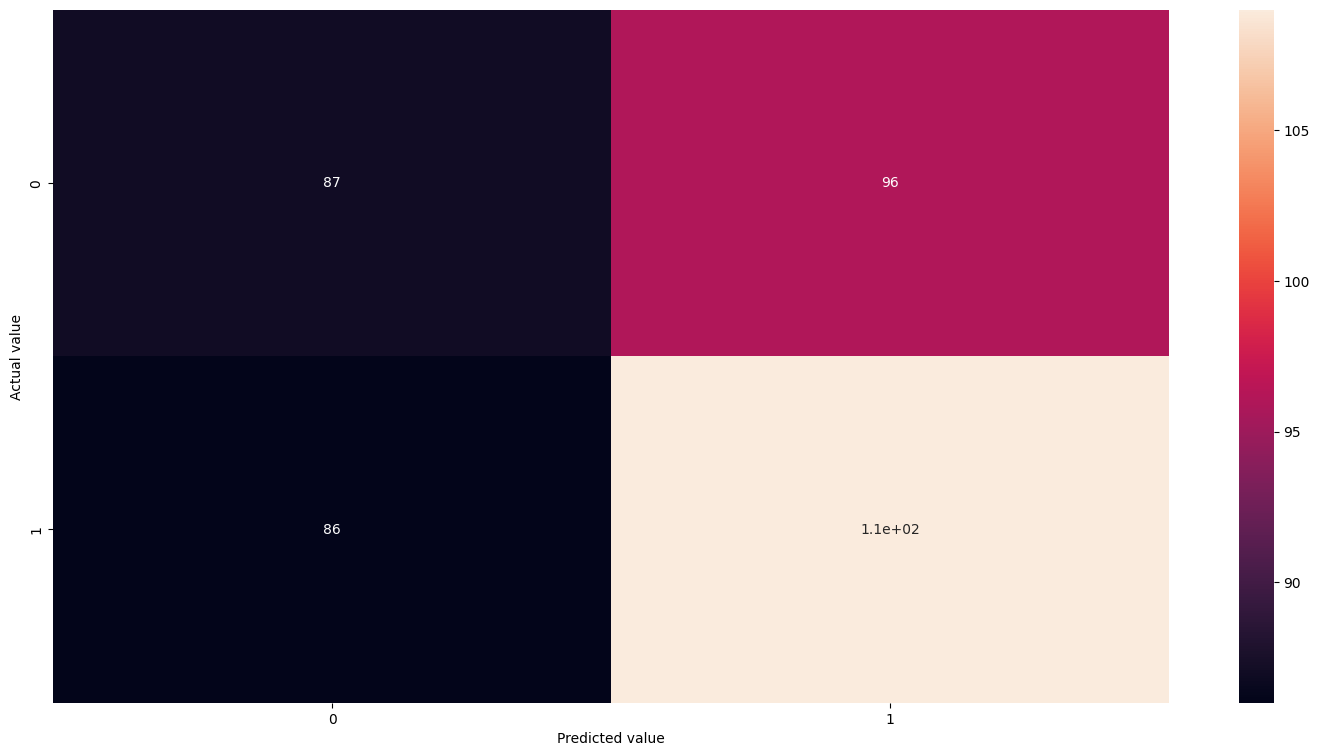

In [13]:
import seaborn as sn 
plt.figure(figsize=(18,9))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()